In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/country_statistics_n46_20170511.csv")

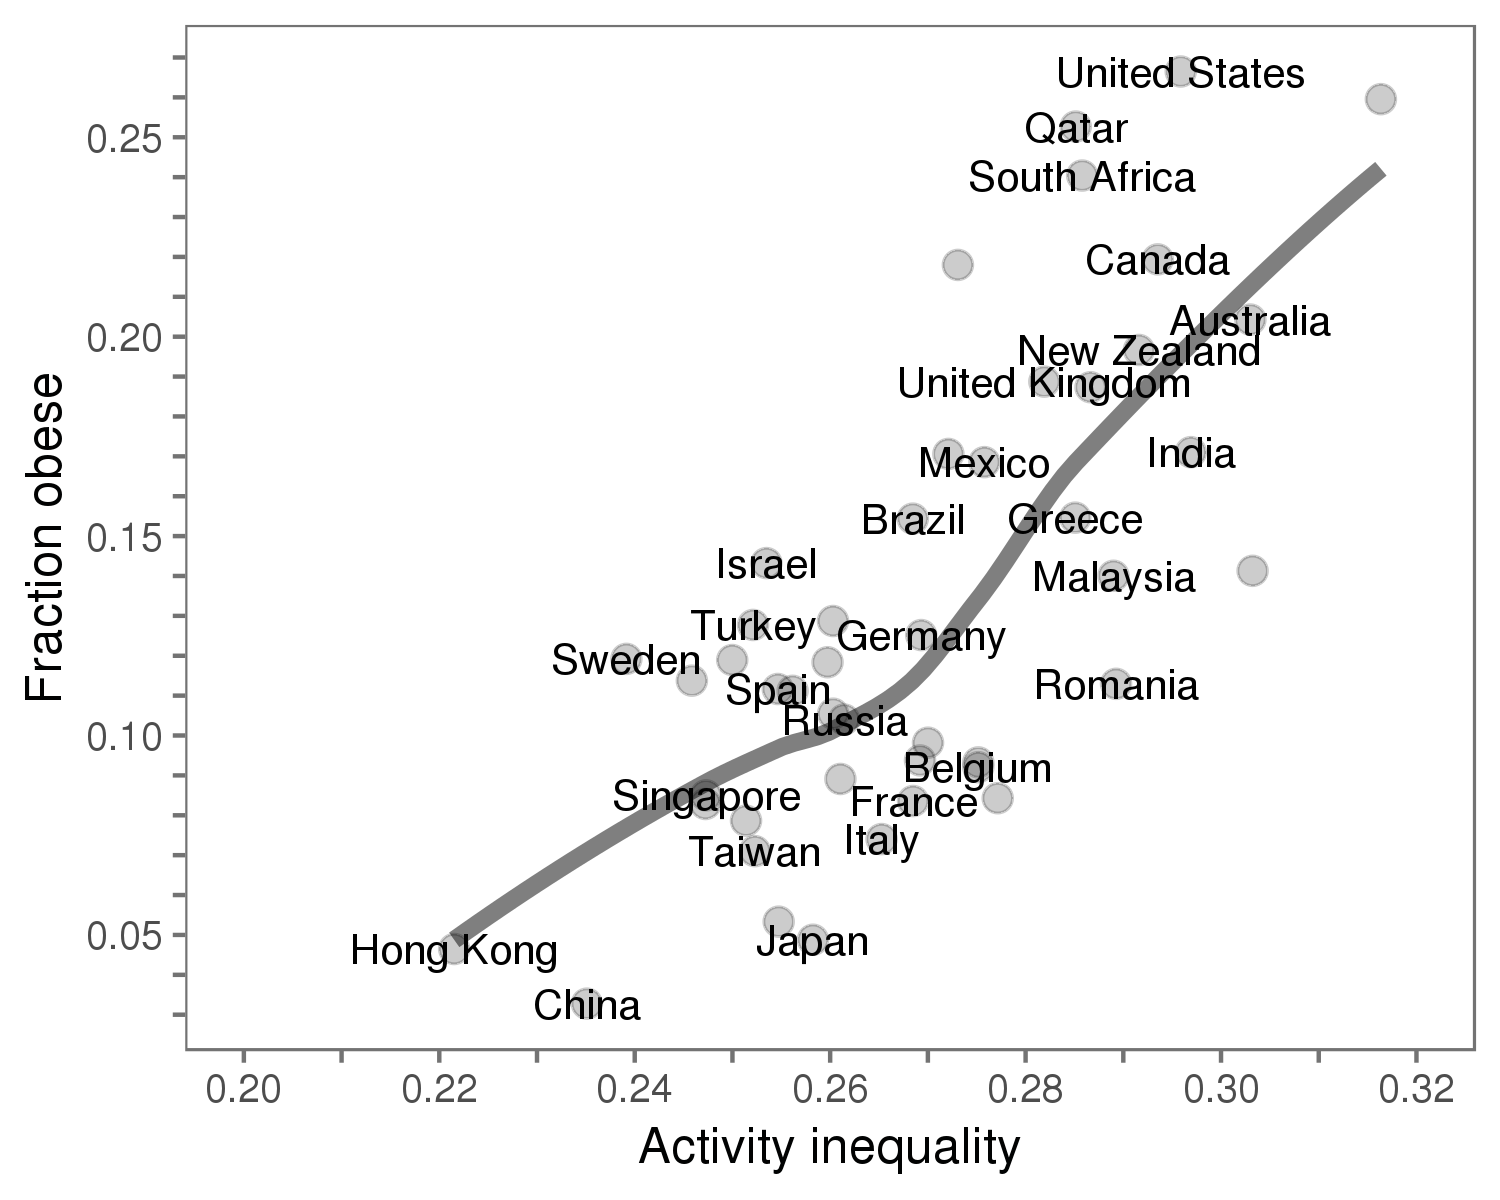

In [4]:
# Same plot as Fig 2a but with gender resampled data.

p <- ggplot(df, aes(steps_gini_gender_resampled, obesity_mean_gender_resampled, 
                   label=country))
p <- p + geom_smooth(aes(group=1), method="loess",span=.9,  se = F, size=2.0, color="gray50", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)

p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + xlab("Activity inequality") + ylab("Fraction obese")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set1")

# xticks
ticks = seq(.20,.36,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.200, .32))

# yticks
ticks = seq(.00,.27,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%.2f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)
p

ggsave(filename="../output/edfig3a.pdf", plot=p, width=4, height=3)

Obesity versus activity inequality on country level where subjects are reweighted to accurately reflect the official gender distribution in each country (Methods). The gender-unbiased estimates are very similar to estimates using all data (r=0.953 for activity inequality and r=0.986 for obesity). 

In [5]:
cor.test(df$steps_gini_gender_resampled, df$steps_gini)


	Pearson's product-moment correlation

data:  df$steps_gini_gender_resampled and df$steps_gini
t = 20.795, df = 44, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9156444 0.9737062
sample estimates:
      cor 
0.9527043 


In [6]:
cor.test(df$obesity_mean_gender_resampled, df$obesity_mean)


	Pearson's product-moment correlation

data:  df$obesity_mean_gender_resampled and df$obesity_mean
t = 39.039, df = 44, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9744584 0.9922034
sample estimates:
      cor 
0.9858702 
